In [123]:
import numpy as np
from bs4 import BeautifulSoup as bs

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score



import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import r2_score, f1_score


# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])


In [124]:
df = pd.read_csv("Final Clean Dataset.csv") 
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,0,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,0,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,0,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,0,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,0,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
6306,NIMIQ 1,1,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
6307,MSAT M1,1,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
6308,ANIK E1,1,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
6309,ANIK E2,1,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


In [125]:
df.Orbit.value_counts()

1    4786
2    1219
3     306
Name: Orbit, dtype: int64

### Linear Regression 

In [126]:
#Linear Regression - Period by given a Perigee:
model = sklearn.linear_model.LinearRegression()
model.fit(df[['Perigee']], df.Period)
period_pred = np.round(model.predict(df[['Perigee']]) , 1)
period_pred
 

array([  91.6,   91.7,   91.6, ..., 1546.7, 1547.6, 1550.1])

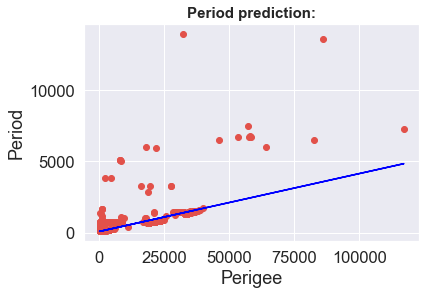

In [127]:
plt.title('Period prediction:' , fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Perigee')
plt.ylabel('Period')
plt.scatter(df[['Perigee']] , df.Period)
plt.plot(df[['Perigee']] , period_pred , color='blue')
plt.show()


In [128]:
#Sorted Period list:
period_pred.sort()
period_pred

array([  84.7,   85. ,   85.6, ..., 3441.5, 3588.3, 4847.5])

In [131]:
#### Linear Regression Period by given a Perigee and Apogee
X = df[df.columns[(df.columns != 'Name') & (df.columns != 'Type') & (df.columns != 'Norad ID') & (df.columns != "Int'l Code") & (df.columns != 'Period') & (df.columns != 'Launch Date') & (df.columns != 'Source')  & (df.columns != 'Month')  & (df.columns != 'Orbit')]]
y = df['Period']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

perigee = float(input("Please enter the satellite's Perigee: "))
apogee = float(input("Please enter the satellite's Apogee: "))
while (0 <= perigee <= 120000 and 0 <= apogee <= 340000):
    print('Closest Period prediction : {:.1f}'.format(model.predict([[perigee, apogee]])[0]+25))
    perigee = float(input("Please enter the satellite's Perigee: "))
    apogee = float(input("Please enter the satellite's Apogee: "))
print('Input is out of range!')


Please enter the satellite's Perigee: 36221.6
Please enter the satellite's Apogee: 36328.1
Closest Period prediction : 1500.1
Please enter the satellite's Perigee: -1
Please enter the satellite's Apogee: 0
Input is out of range!


#### First Logistic Regression

In [132]:
#### 1. Logistic Regression by Orbit split (low, med, high)

X = df[df.columns[(df.columns != 'Name') & (df.columns != 'Type') & (df.columns != 'Norad ID') & (df.columns != "Int'l Code") & (df.columns != 'Period') & (df.columns != 'Launch Date') & (df.columns != 'Source')  & (df.columns != 'Month')  & (df.columns != 'Orbit')]]
y = df['Orbit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = scaler.fit_transform(X_train)
model = sklearn.linear_model.LogisticRegression().fit(X_train_scaled, y_train)

scaler.fit(X_test)
perigee = float(input("Please enter the satellite's Perigee: "))
apogee = float(input("Please enter the satellite's Apogee: "))
values = scaler.transform([[perigee, apogee]])
predicted_vals = model.predict_proba(values)[0]
while (0 <=perigee <= 120000 and 0 <= apogee <= 340000):
    lowP, medP, highP = predicted_vals[0]*100, predicted_vals[1]*100, predicted_vals[2]*100
    print('Values ({}, {}):\tLow orbit probability: {:.2f}%\n\t\t\tMedium orbit probability: {:.2f}%\n\t\t\tHigh orbit probability: {:.2f}%\n'.format(perigee, apogee, lowP, medP, highP))
    perigee = float(input("Please enter the satellite's Perigee: "))
    apogee = float(input("Please enter the satellite's Apogee: "))
    values = scaler.transform([[perigee,apogee]])
    predicted_vals = model.predict_proba(values)[0]
print('Input is out of range!')


Please enter the satellite's Perigee: 350
Please enter the satellite's Apogee: 450
Values (350.0, 450.0):	Low orbit probability: 97.47%
			Medium orbit probability: 2.51%
			High orbit probability: 0.03%

Please enter the satellite's Perigee: 36221.6
Please enter the satellite's Apogee: 35791.1
Values (36221.6, 35791.1):	Low orbit probability: 0.41%
			Medium orbit probability: 86.57%
			High orbit probability: 13.02%

Please enter the satellite's Perigee: -1
Please enter the satellite's Apogee: 0
Input is out of range!


##### Second Logistic Regression

In [133]:
# DataSet with only numeric variables for the machine learning

df_copy=df[["Type","Perigee","Apogee","Period","Orbit"]].copy()
df_copy

,Type,Perigee,Apogee,Period,Orbit
0,0,315.2,329.2,90.8,1
1,0,315.9,328.5,90.8,1
2,0,315.4,329.3,90.8,1
3,0,315.2,329.3,90.8,1
4,0,315.5,329.5,90.8,1
...,...,...,...,...,...
6306,1,36221.6,36328.1,1460.7,3
6307,1,36190.0,36322.7,1459.8,3
6308,1,36054.9,36150.6,1451.9,3
6309,1,36078.6,36157.1,1452.7,3


In [134]:
# Features for train and fit

TRAINING_FEATURES = df_copy.columns[df_copy.columns != 'Type'] 
TARGET_FEATURE = 'Type'

In [135]:
X = df_copy[TRAINING_FEATURES] 
y = df_copy[TARGET_FEATURE]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [138]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #6311
Number of training samples: #4102
Number of test samples: #2209

Target distribution in original dataset:
0    3942
2    1255
1    1114
Name: Type, dtype: int64

Target distribution in the training set:
0    2556
2     818
1     728
Name: Type, dtype: int64

Target distribution in the test set:
0    1386
2     437
1     386
Name: Type, dtype: int64


In [139]:
# Logistic Regression 2
clf_model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
y_pred=clf_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print("accuracy is:",metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test,y_pred,target_names=['Communication satellites','Gps satellites','Earth observations and exploration ']))

[[1305   78    3]
 [  57  329    0]
 [ 436    0    1]]
accuracy is: 0.740153915799004

                                     precision    recall  f1-score   support

           Communication satellites       0.73      0.94      0.82      1386
                     Gps satellites       0.81      0.85      0.83       386
Earth observations and exploration        0.25      0.00      0.00       437

                           accuracy                           0.74      2209
                          macro avg       0.59      0.60      0.55      2209
                       weighted avg       0.65      0.74      0.66      2209



#### Unsupervised Learning - KMeans 

In [141]:
targ = df['Type']
targ

0       0
1       0
2       0
3       0
4       0
       ..
6306    1
6307    1
6308    1
6309    1
6310    1
Name: Type, Length: 6311, dtype: int64

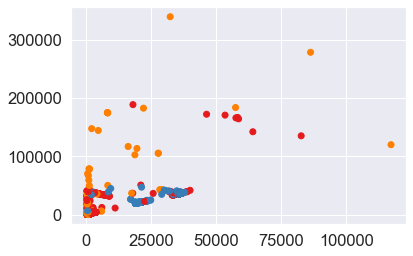

In [142]:
df_copy = df.copy()
X_Kmeans=df[["Perigee","Apogee","Period","Orbit","Type"]].copy()
X_val = X_Kmeans.values
plt.scatter(X_val[:, 0], X_val[:, 1], c = targ ,marker="o",cmap=cmap);

In [143]:
# finding optimal number of clusters using the elbow method and silhouette
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 71)
    y = kmeans.fit_predict(X_val)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    print("( k =",i,")    silhouette =", silhouette_score(X_val, y))
    

( k = 2 )    silhouette = 0.8982504258692393
( k = 3 )    silhouette = 0.9094284416500374
( k = 4 )    silhouette = 0.9381343365484166
( k = 5 )    silhouette = 0.9560607810608135
( k = 6 )    silhouette = 0.9567751157366728
( k = 7 )    silhouette = 0.957788932871607
( k = 8 )    silhouette = 0.9580116817914003
( k = 9 )    silhouette = 0.9580960227848326
( k = 10 )    silhouette = 0.9585790108815178


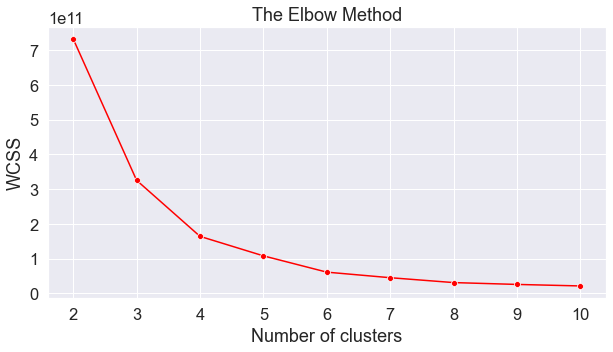

In [144]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

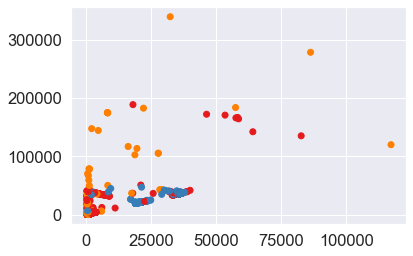

In [145]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 71)
y_kmeans = kmeans.fit_predict(X_val)
plt.scatter(X_val[:, 0], X_val[:, 1], c=targ,  marker="o", cmap=cmap);


In [146]:
print("silhouette_score =",silhouette_score(X_val, y_kmeans))

silhouette_score = 0.9560607810608135


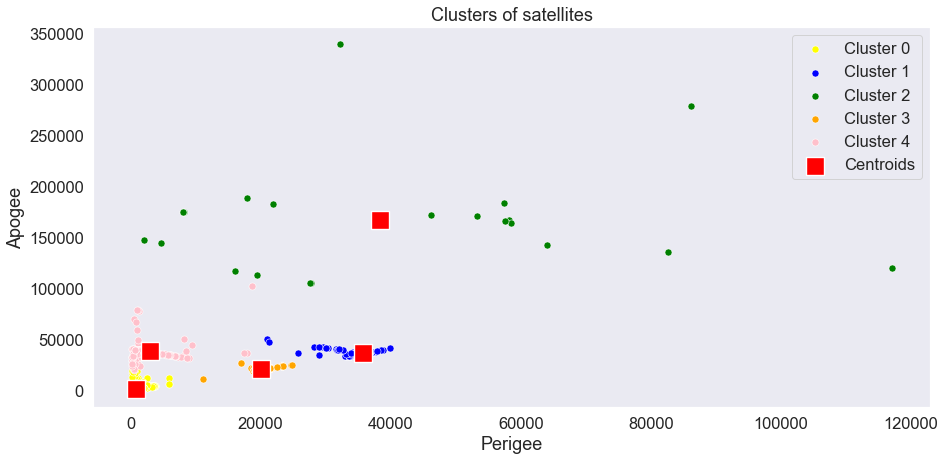

In [147]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_val[y_kmeans == 0, 0], X_val[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 0',s=50)
sns.scatterplot(X_val[y_kmeans == 1, 0], X_val[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(X_val[y_kmeans == 2, 0], X_val[y_kmeans == 2, 1], color = 'green', label = 'Cluster 2',s=50)
sns.scatterplot(X_val[y_kmeans == 3, 0], X_val[y_kmeans == 3, 1], color = 'orange', label = 'Cluster 3',s=50)
sns.scatterplot(X_val[y_kmeans == 4, 0], X_val[y_kmeans == 4, 1], color = 'pink', label = 'Cluster 4',s=50)
#sns.scatterplot(X_val[y_kmeans == 5, 0], X_val[y_kmeans == 5, 1], color = 'black', label = 'Cluster 6',s=50)
#sns.scatterplot(X_val[y_kmeans == 6, 0], X_val[y_kmeans == 6, 1], color = 'purple', label = 'Cluster 7',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of satellites')
plt.xlabel('Perigee')
plt.ylabel('Apogee')
plt.legend()
plt.show()

In [148]:
pd.crosstab(targ,y_kmeans)

col_0,0,1,2,3,4
Type,,,,,
0,3532,281,8,2,119
1,128,705,0,274,7
2,1216,4,15,0,20


In [149]:
print("homogenity:",metrics.homogeneity_score(targ.values,kmeans.labels_))
print("completeness:",metrics.completeness_score(targ.values,kmeans.labels_))
print("v measure:",metrics.v_measure_score(targ.values,kmeans.labels_))

homogenity: 0.3084304489236112
completeness: 0.3869412272281767
v measure: 0.3432537174407107


In [151]:
# Adding the Cluster into the dataframe.
df_copy['Clusters'] = y_kmeans
df_copy

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit,Clusters
0,STARLINK-3314,0,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1,0
1,STARLINK-3312,0,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1,0
2,STARLINK-3311,0,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1,0
3,STARLINK-3315,0,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1,0
4,STARLINK-3319,0,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6306,NIMIQ 1,1,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3,1
6307,MSAT M1,1,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3,1
6308,ANIK E1,1,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3,1
6309,ANIK E2,1,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3,1


In [152]:
tmp = df_copy[df_copy["Clusters"] == 0]
tmp.describe()

,Type,Norad ID,Perigee,Apogee,Period,Month,Orbit,Clusters
count,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.000000,4876.0
mean,0.525021,35628.579163,785.491735,910.578302,102.018191,6.260254,1.018458,0.0
std,0.865042,15388.129267,451.176070,1004.713085,15.194885,3.588150,0.134613,0.0
min,0.000000,5.000000,145.200000,161.300000,87.400000,1.000000,1.000000,0.0
25%,0.000000,22690.750000,552.700000,555.400000,95.600000,3.000000,1.000000,0.0
50%,0.000000,43925.500000,553.500000,565.900000,95.600000,6.000000,1.000000,0.0
75%,1.000000,47591.250000,966.700000,1177.475000,106.100000,10.000000,1.000000,0.0
max,2.000000,50851.000000,5975.200000,19114.700000,347.200000,12.000000,2.000000,0.0


In [153]:
tmp = df_copy[df_copy["Clusters"] == 1]
tmp.describe()

,Type,Norad ID,Perigee,Apogee,Period,Month,Orbit,Clusters
count,990.000000,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.0
mean,0.720202,25028.89899,35715.246162,36060.302727,1440.999596,6.816162,2.281818,1.0
std,0.458043,11364.20377,1117.800948,1002.150097,28.741191,3.403225,0.450113,0.0
min,0.000000,553.00000,20957.900000,33545.700000,1197.800000,1.000000,2.000000,1.0
25%,0.000000,16256.50000,35771.400000,35804.900000,1436.100000,4.000000,2.000000,1.0
50%,1.000000,25118.00000,35786.150000,35840.050000,1436.100000,7.000000,2.000000,1.0
75%,1.000000,34712.25000,36045.525000,36157.000000,1451.600000,10.000000,3.000000,1.0
max,2.000000,49115.00000,39891.500000,50634.300000,1695.500000,12.000000,3.000000,1.0


In [154]:
tmp = df_copy[df_copy["Clusters"] == 2]
tmp.describe()

,Type,Norad ID,Perigee,Apogee,Period,Month,Orbit,Clusters
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0
mean,1.304348,19496.956522,38411.900000,166933.186957,6141.904348,6.304348,3.0,2.0
std,0.973970,15601.171895,30770.975687,52757.050946,2784.431438,2.530447,0.0,0.0
min,0.000000,674.000000,2076.300000,105133.200000,3256.400000,3.000000,3.0,2.0
25%,0.000000,2112.000000,12173.350000,138531.300000,4448.700000,3.500000,3.0,2.0
50%,2.000000,25867.000000,27677.300000,166615.600000,6000.200000,7.000000,3.0,2.0
75%,2.000000,30470.500000,57831.200000,174735.100000,6739.750000,7.500000,3.0,2.0
max,2.000000,40485.000000,117133.000000,339419.700000,13976.800000,10.000000,3.0,2.0


In [155]:
tmp = df_copy[df_copy["Clusters"] == 3]
tmp.describe()

,Type,Norad ID,Perigee,Apogee,Period,Month,Orbit,Clusters
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.0,276.0
mean,0.992754,29840.731884,20125.702899,20375.427899,721.324638,7.891304,2.0,3.0
std,0.084971,10276.409172,1546.091074,1604.677723,61.721853,3.521745,0.0,0.0
min,0.000000,10684.000000,11081.600000,11105.000000,382.800000,1.000000,2.0,3.0
25%,1.000000,21777.750000,19096.475000,19170.975000,675.700000,5.000000,2.0,3.0
50%,1.000000,28113.500000,19130.250000,19324.850000,676.550000,9.000000,2.0,3.0
75%,1.000000,40128.250000,21288.200000,21510.300000,767.050000,11.000000,2.0,3.0
max,1.000000,49810.000000,24774.700000,26173.400000,912.100000,12.000000,2.0,3.0


In [156]:
tmp = df_copy[df_copy["Clusters"] == 4]
tmp.describe()

,Type,Norad ID,Perigee,Apogee,Period,Month,Orbit,Clusters
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.0
mean,0.321918,20734.445205,2929.900685,37966.123288,738.922603,7.054795,2.027397,4.0
std,0.704027,9456.334455,3188.966656,10060.796707,260.985521,3.469633,0.163800,0.0
min,0.000000,2514.000000,205.100000,19710.600000,351.400000,1.000000,2.000000,4.0
25%,0.000000,13091.000000,817.075000,34384.625000,708.425000,4.000000,2.000000,4.0
50%,0.000000,19988.000000,1846.350000,37202.700000,717.600000,7.000000,2.000000,4.0
75%,0.000000,25627.500000,4105.600000,39006.575000,718.275000,10.000000,2.000000,4.0
max,2.000000,49332.000000,18680.500000,102444.000000,2872.200000,12.000000,3.000000,4.0


In [157]:
df_copy.Clusters.value_counts()

0    4876
1     990
3     276
4     146
2      23
Name: Clusters, dtype: int64